In [1]:
import pandas as pd

In [209]:
# kiwoom df 불러오기
kiwoom = pd.read_csv('./Data/kiwom_test.csv')
# kiwoom['시작시간2'] = kiwoom['시작시간'].str[:3] + '00'

# json 파일 불러와 dict로 변경
dict_weather = pd.read_json('./Data/result_dict.json').to_dict()

In [160]:
kiwoom = pd.read_csv('./Data/kiwom_test.csv')
# 날씨의 시간정보와 kiwoom의 시간정보 형식을 맞추기
kiwoom['시작시간2'] = kiwoom['시작시간'].str[:3] + '00'

dict_weather = pd.read_json('./Data/result_dict.json').to_dict()

for time in kiwoom.날짜 :
    # time의 시간별(12:00 ~ 19:00) 날씨 DataFrame
    weather_df = pd.DataFrame(dict_weather[pd.to_datetime(time)])

    # (time(날짜)에서의 키움경기 시작시간 == 날씨 DataFrame의 시간)인 경우의 날씨 DataFrame
    merge_weather_df = weather_df[kiwoom[kiwoom.날짜 == time].시작시간2.values[0] == weather_df['시간'].str[11:]]

    kiwoom.loc[kiwoom.날짜 == time, merge_weather_df.columns] = merge_weather_df.values[0]

In [182]:
kiwoom.drop(columns=['시작시간2', '시간', '위치'], inplace=True)

In [184]:
kiwoom.현상번호 = kiwoom.현상번호.astype(int)

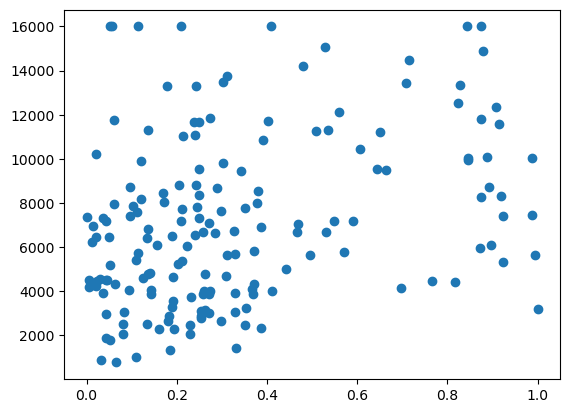

In [205]:
import matplotlib.pyplot as plt

plt.scatter(
    data=kiwoom,
    x='일사',
    y='관중 수'
)

In [197]:
kiwoom.일사 = (kiwoom.일사 - kiwoom.일사.min()) / (kiwoom.일사.max() - kiwoom.일사.min())

In [198]:
kiwoom.corr(numeric_only=True)

,관중 수,기온,강수량,풍속,습도,기압,일조,일사,시정,현상번호
관중 수,1.000000,0.130653,-0.013113,-0.060937,-0.077848,0.105053,0.174704,0.338600,0.096035,0.160733
기온,0.130653,1.000000,-0.001393,-0.239010,0.027063,-0.315741,0.243634,0.322657,0.090171,-0.227500
강수량,-0.013113,-0.001393,1.000000,-0.094019,0.316474,-0.187314,-0.211214,-0.182478,-0.291983,0.148108
풍속,-0.060937,-0.239010,-0.094019,1.000000,-0.170342,0.069293,0.137875,-0.010603,0.160969,0.084944
습도,-0.077848,0.027063,0.316474,-0.170342,1.000000,-0.537552,-0.654847,-0.512461,-0.468709,0.295824
기압,0.105053,-0.315741,-0.187314,0.069293,-0.537552,1.000000,0.273439,0.137705,0.236248,-0.143957
일조,0.174704,0.243634,-0.211214,0.137875,-0.654847,0.273439,1.000000,0.634432,0.280867,-0.162344
일사,0.338600,0.322657,-0.182478,-0.010603,-0.512461,0.137705,0.634432,1.000000,0.253639,-0.179856
시정,0.096035,0.090171,-0.291983,0.160969,-0.468709,0.236248,0.280867,0.253639,1.000000,-0.391472
현상번호,0.160733,-0.227500,0.148108,0.084944,0.295824,-0.143957,-0.162344,-0.179856,-0.391472,1.000000


In [206]:
kiwoom

,날짜,요일,원정팀,관중 수,시작시간,기온,강수량,풍속,습도,기압,일조,일사,시정,현상번호
0,2022-04-02,토,롯데,8257,14:00,14.0,0.0,3.6,36.0,1015.4,1.0,0.874286,2000.0,0
1,2022-04-03,일,롯데,6115,14:00,16.0,0.0,3.8,28.0,1016.7,1.0,0.897143,2000.0,0
2,2022-04-05,화,LG,2298,18:30,13.3,0.0,2.7,26.0,1009.5,0.5,0.160000,2000.0,0
3,2022-04-06,수,LG,2304,18:30,14.8,0.0,3.6,35.0,1008.7,0.9,0.194286,2000.0,0
4,2022-04-07,목,LG,2055,18:30,12.2,0.0,3.3,22.0,1006.7,1.0,0.228571,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2024-05-22,수,NC,4337,18:30,24.4,0.0,2.9,49.0,1003.4,1.0,0.371429,2162.0,0
169,2024-05-23,목,NC,3897,18:30,24.1,0.0,3.8,43.0,999.4,1.0,0.368571,3665.0,0
170,2024-05-31,금,SSG,5680,18:30,21.4,0.0,5.2,45.0,999.7,0.9,0.328571,3971.0,0
171,2024-06-01,토,SSG,10462,17:00,24.5,0.0,3.9,45.0,998.7,1.0,0.605714,3308.0,0


In [211]:
kiwoom

,날짜,요일,원정팀,관중 수,시작시간
0,2022-04-02,토,롯데,8257,14:00
1,2022-04-03,일,롯데,6115,14:00
2,2022-04-05,화,LG,2298,18:30
3,2022-04-06,수,LG,2304,18:30
4,2022-04-07,목,LG,2055,18:30
...,...,...,...,...,...
168,2024-05-22,수,NC,4337,18:30
169,2024-05-23,목,NC,3897,18:30
170,2024-05-31,금,SSG,5680,18:30
171,2024-06-01,토,SSG,10462,17:00


In [221]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [231]:
import seaborn as sns

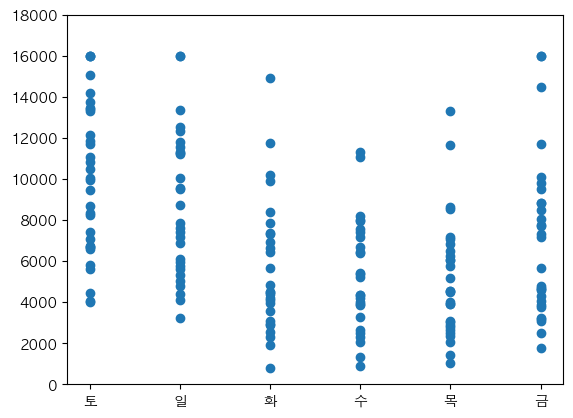

In [243]:
plt.scatter(
    kiwoom.요일,
    kiwoom['관중 수'],
    # kind='bar'
)

plt.ylim(0, 18000)

plt.show()

In [ ]:
sns.violinplot(
    x='요일',
    y='관중 수',
    data=kiwoom
)

plt.ylim(0, 16000)

plt.show()

In [227]:
kiwoom['관중 수']

0       8257
1       6115
2       2298
3       2304
4       2055
       ...  
168     4337
169     3897
170     5680
171    10462
172     8745
Name: 관중 수, Length: 173, dtype: int64

In [256]:
kiwoom

,날짜,요일,원정팀,관중 수,시작시간
0,2022-04-02,토,롯데,8257,14:00
1,2022-04-03,일,롯데,6115,14:00
2,2022-04-05,화,LG,2298,18:30
3,2022-04-06,수,LG,2304,18:30
4,2022-04-07,목,LG,2055,18:30
...,...,...,...,...,...
168,2024-05-22,수,NC,4337,18:30
169,2024-05-23,목,NC,3897,18:30
170,2024-05-31,금,SSG,5680,18:30
171,2024-06-01,토,SSG,10462,17:00


<Axes: xlabel='날짜'>

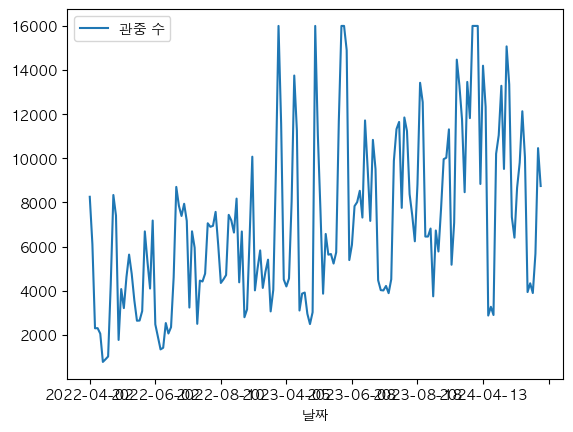

In [258]:
kiwoom.plot(
    x='날짜',
    y='관중 수'
)

<Axes: xlabel='날짜'>

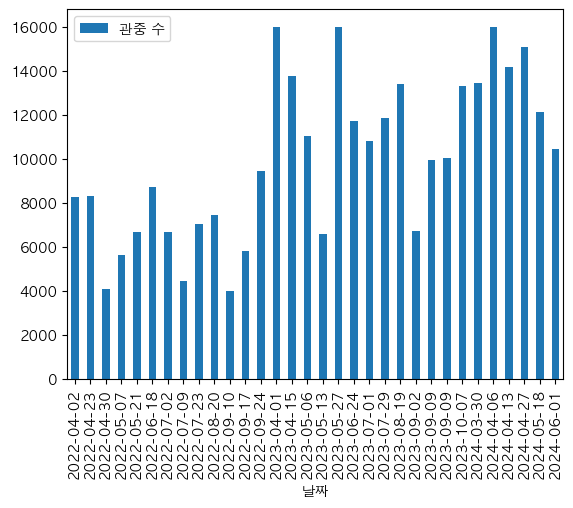

In [265]:
kiwoom[kiwoom.요일 == '토'].plot(
    kind='bar',
    y='관중 수',
    x='날짜'
)

<Axes: xlabel='시작시간'>

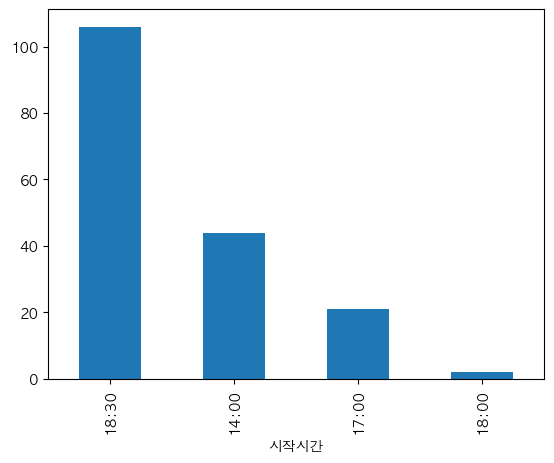

In [283]:
kiwoom.시작시간.value_counts().plot(kind='bar')